Este código importa las bibliotecas necesarias, carga el conjunto de datos, explora los datos, verifica la distribución de clases, grafica la distribución de las clases y la matriz de correlación.

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('creditcard.csv')

# Explorar los datos
print(df.describe())
#print(df.head())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

A continuación, puedes visualizar la distribución de cada variable con un histograma:

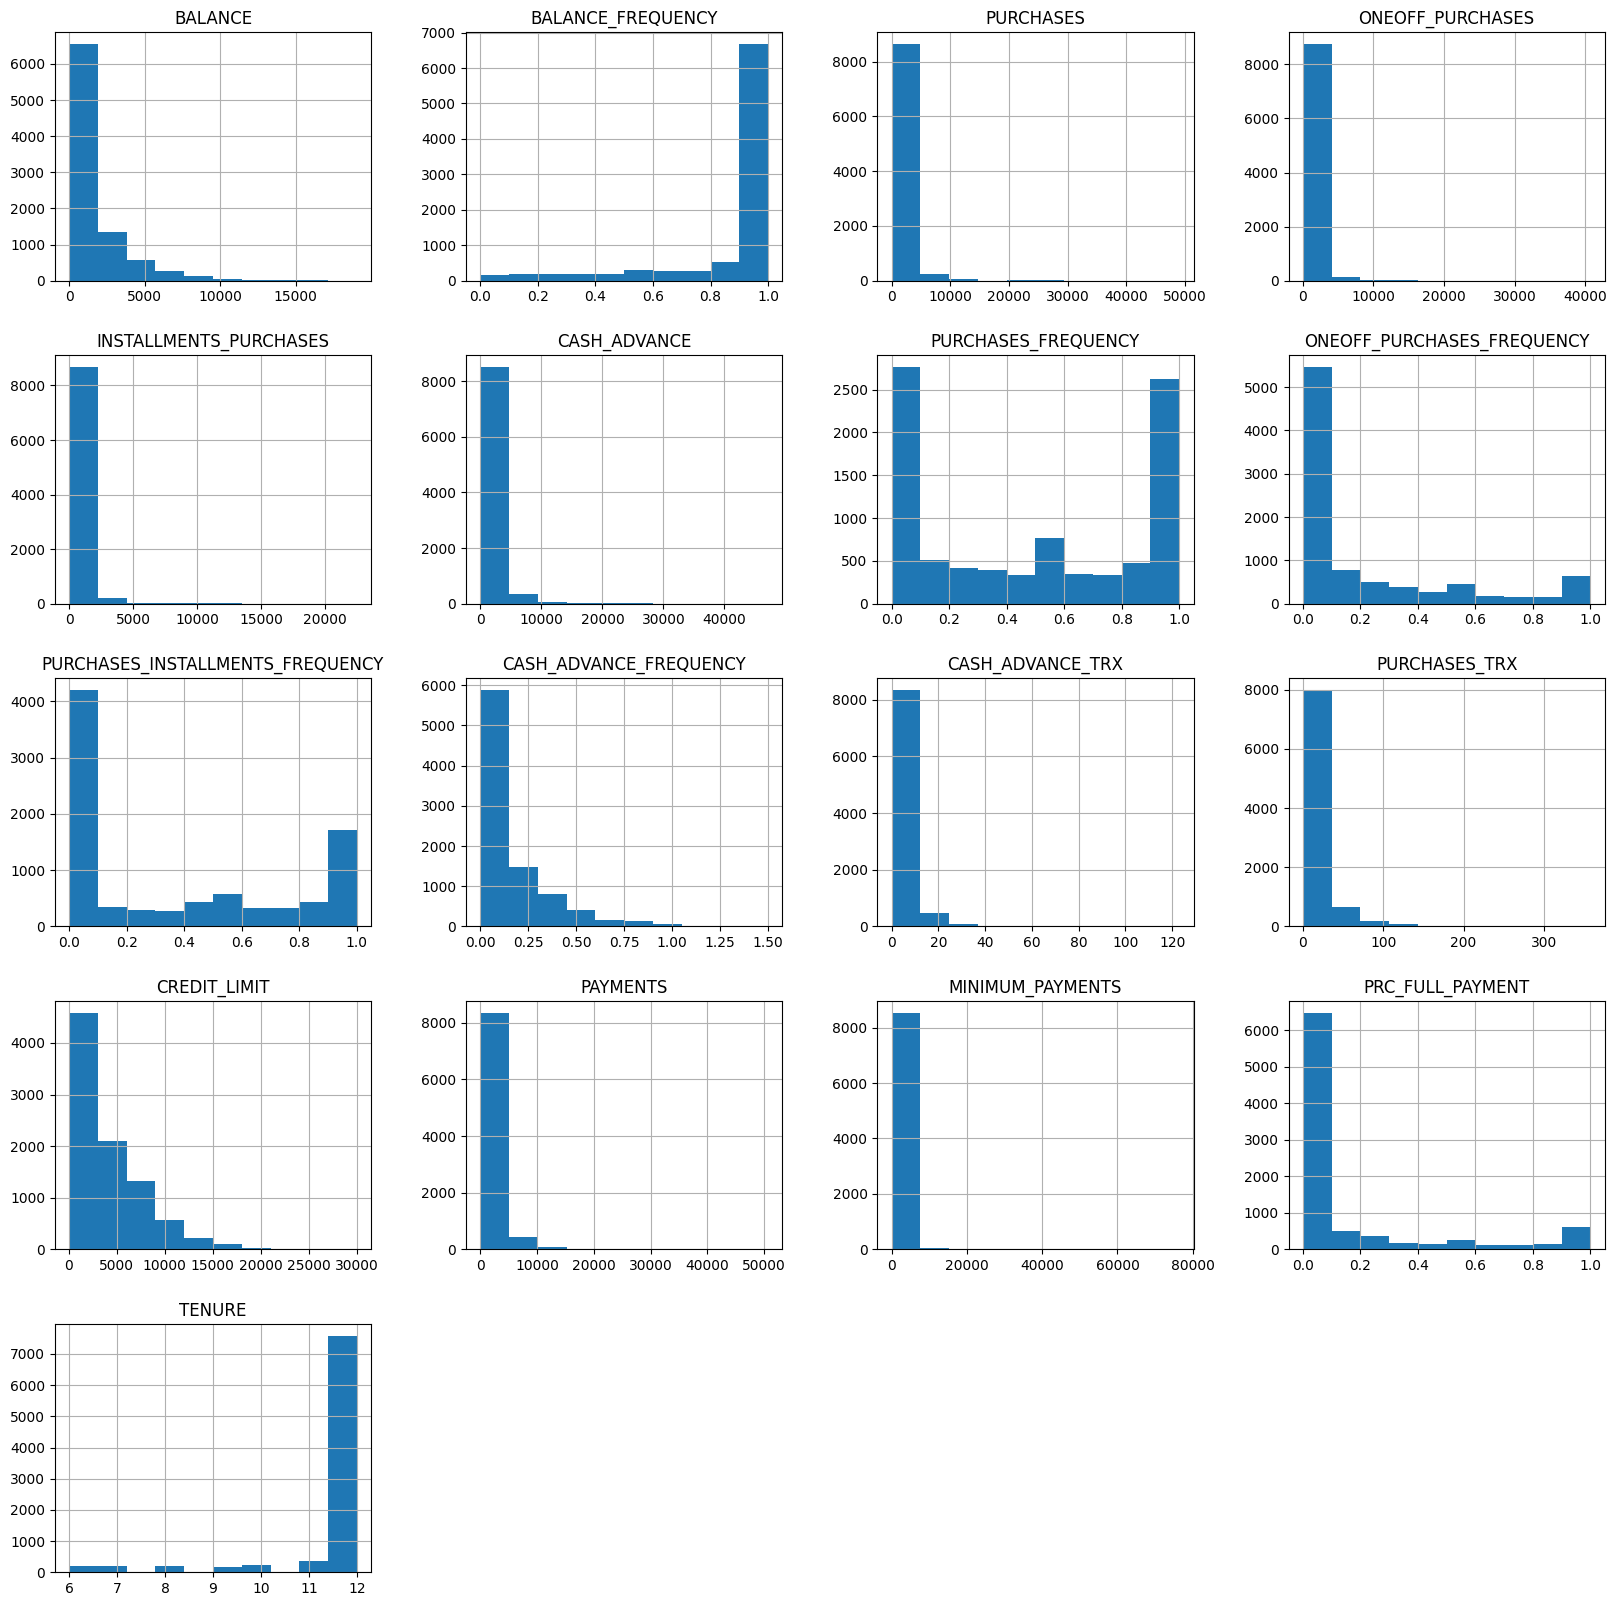

In [3]:
df.hist(figsize=(20,20))
plt.show()

Mostrar la correlación entre las variables utilizando una matriz de correlación:

C:\Users\Crih\AppData\Local\Temp\ipykernel_16852\1115454827.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


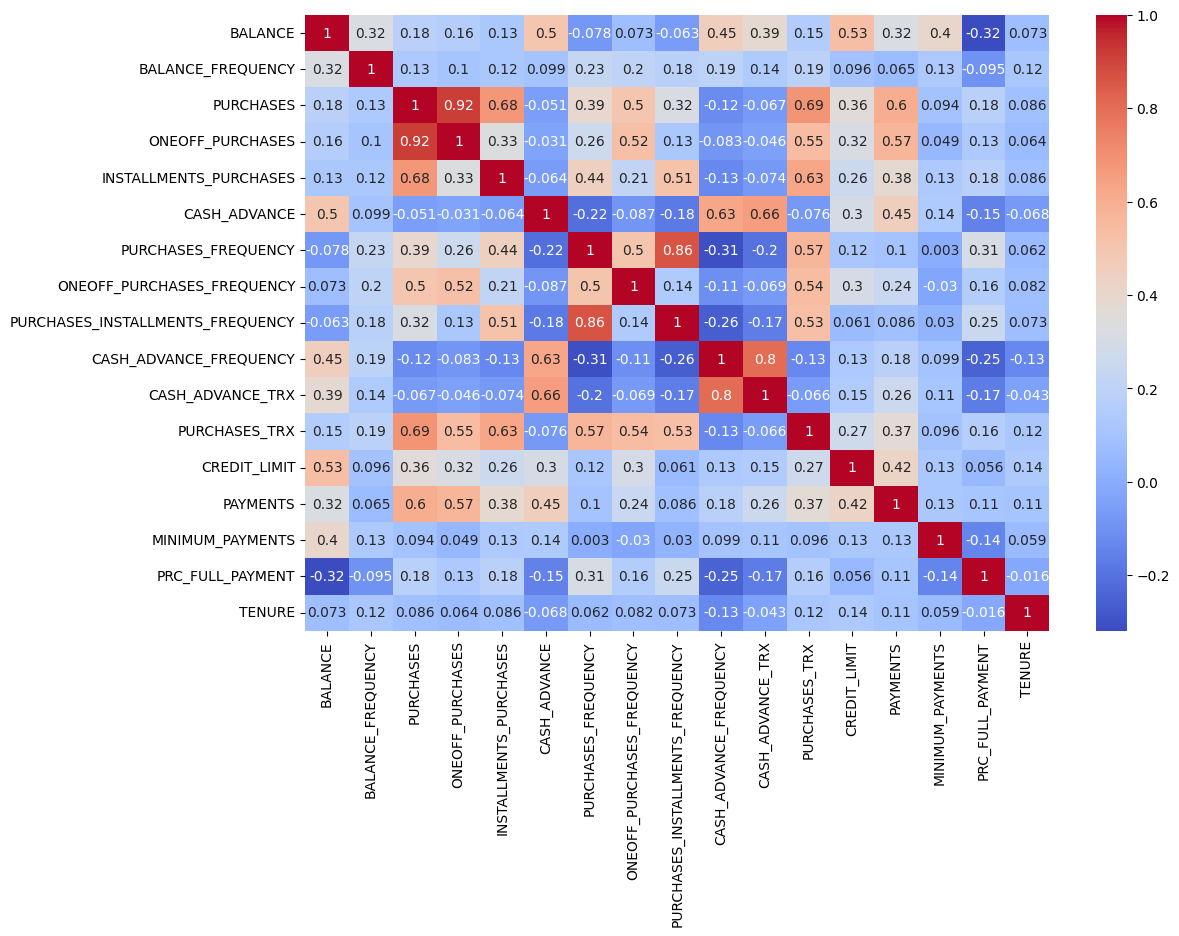

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Visualización de dispersión para mostrar la relación entre dos variables:

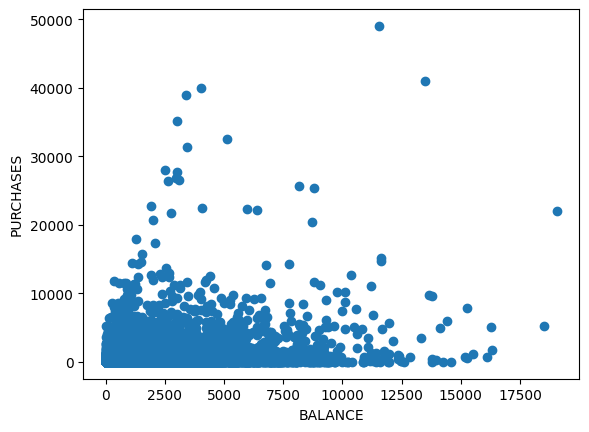

In [5]:
plt.scatter(df["BALANCE"], df["PURCHASES"])
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.show()

In [6]:
# Identificar los valores faltantes en el conjunto de datos
missing_values = df.isnull().sum()
print(missing_values)

# Tratar los valores faltantes
df = df.fillna(df.mean())

# Identificar los datos atípicos en el conjunto de datos
outliers = []
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

outliers = detect_outliers(df['BALANCE'])
print(outliers)

# Tratar los datos atípicos
df = df[df['BALANCE'] <= np.percentile(df['BALANCE'], 99)]


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


C:\Users\Crih\AppData\Local\Temp\ipykernel_16852\2174290029.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


[12136.21996, 8181.251131, 9381.255094, 8504.876253, 14224.11541, 11167.23403, 9354.06045, 19043.13856, 10598.46777, 13673.07961, 11972.01104, 8350.145568, 9047.621884, 9612.21512, 7938.559134, 8097.334733, 9261.310686, 9206.811696, 8939.461145, 8806.866629, 11278.95243, 12474.72954, 7957.017218, 11209.37076, 9335.31417, 8647.057641, 9601.071318, 10249.71178, 12478.17286, 13479.28821, 15258.2259, 11547.52001, 8997.488544, 9149.4096, 9559.783145, 7975.19143, 15244.74865, 8781.831676, 8900.194109, 14411.95798, 10359.45471, 13763.47358, 7811.234174, 13774.74154, 10397.09989, 9470.18498, 8646.143734, 9164.724752, 8220.740014, 11083.32542, 10131.00055, 9901.685569, 11654.55492, 14581.45914, 9255.143419, 12358.32132, 12373.33348, 8823.284205, 8115.039014, 8884.816576, 9387.614011, 7994.33168, 7886.875682, 9680.188434, 8787.333948, 8625.355309, 8151.985277, 11431.78621, 8281.348085, 8767.5693, 8809.504736, 8159.168439, 8953.743398, 7919.563494, 11670.17985, 10822.05811, 9502.256762, 11734.266